# Supplementary Figures 9-12

Outlier removal metrics

In [ ]:
library(ggpubr)

In [ ]:
df <- read.csv(file = "../data/multi/combined_td_post_and_test.csv")

df$Out <- factor(df$Out, levels = c("Jackknife", "rPCA", "None")) # change order
df$Data <- factor(df$Data, levels = c("THCA","PRAD","LIHC","KIRC","BRCA","COAD","LUAD"))

head(df)

In [20]:
met <- "rep"
ylim <- c(0, 0.82)
labely <- c(0.75,0.75)

if (met=="rec") {
    ylab <- "Median Recall"
    ylim <- c(0,1)
    prefix <- "sfig12_"
} else if (met == "prec") {
    ylab <- "Median Precision"
    ylim <- c(0.55, 1)
    labely <- c(0.55,0.55)
    prefix <- "sfig11_"
} else if (met == "MCC") {
    ylim <- c(0,1)
    ylab <- "Median MCC"
    prefix <- "sfig10_"
} else if (met == "rep") {
    ylim <- c(0,1)
    ylab <- "Median Replicability"
    prefix <- "sfig9_"
}

[1] "../figures/sfig9_rep_vs_outlier.pdf"


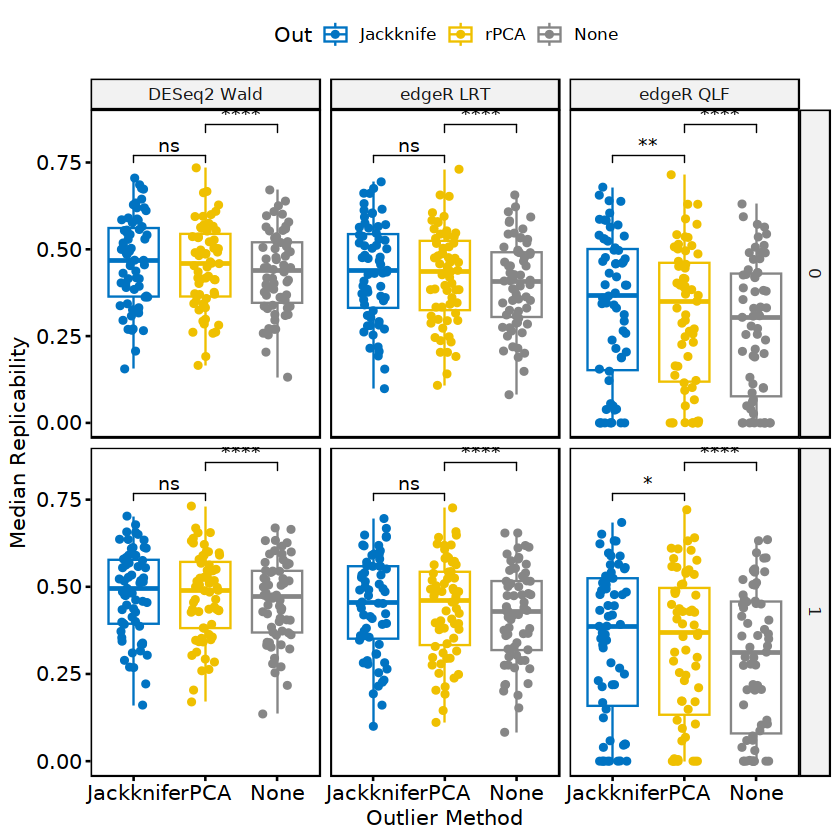

In [23]:
df_red <- df[which((df["FDR"] == 0.05) & (df["logFC"] != "test")),]
df_red <- df_red[which(df_red["N"] < 15),]
df_red$Out <- factor(df_red$Out, levels = c("Jackknife", "rPCA", "None"))

p <- ggboxplot(df_red, x = "Out", y = paste0("median_",met,"_adj"),
          color = "Out", palette = "jco", id="id",
          facet.by = c("logFC","DEA"), short.panel.labs = TRUE,
          add="jitter",scales="free",
          xlab="Outlier Method", ylab=ylab)


my_comparisons <- list(c("Jackknife","rPCA"), c("rPCA", "None"))
p <- p + stat_compare_means(label = "p.signif", comparisons = my_comparisons, paired = TRUE)#, label.y=labely)

ggpar(p)#, ylim = ylim)

figpath <- paste0("../figures/",prefix,met,"_vs_outlier.pdf")
print(figpath)
ggsave(figpath,height=8,width=9)